# DS CHALLENGE

## EXERCICE 3

### PROBLEM STATEMENT

#### Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file.

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

Bonus point: Solving this problem using pandas (instead of any other approach)

### PROBLEM SOLUTION

In order to solve the problem, the folling approach is consdered:

1. Take a look of the searches.csv file to see the type of separation between the characters, the number of columns, and a general overview of the information inside.


2. Depending on the information found in step 1, drop duplicates (if it is obvious that duplicates must be an error).


3. As searches.csv file is very big (with more that 3 thousand lines) the first approach will be to reduce the problem considering a piece of the file. I will take a dataframe of 10000 rows.

    3.1. If the number of columns are bigger than the ones we need to solve the problem, I will take only the ones needed to solve the problem. This will probably reduce the data in memory and it will be earier to work with it.
    
    3.2. Data study: data quality, types, lenth of the strings, NaN, date format, etc.
    
    3.3. Solve all the problems find related with the quality of the information.
    
    3.4. Groupby 'Destination' and month, and then count the number of searches, considering only 'Destinations' from Madrid (MAD), Barcelona (BCN), and Málaga (AGP).
    
    3.5. Graph the information with SEABORN as relplot.
    

4. When everything is OK with the sample it is time to integrate all the knowledge in for the total of the data, using chunks and the powerfull 'read_csv' function.

### 1. MAIN OVERVIEW

In [1]:
searches_path = '/home/dsc/Data/challenge/searches.csv'

!head -1 /home/dsc/Data/challenge/searches.csv | tr "^" "\n" | wc -l 

45


In [2]:
!head -1 /home/dsc/Data/challenge/searches.csv

Date^Time^TxnCode^OfficeID^Country^Origin^Destination^RoundTrip^NbSegments^Seg1Departure^Seg1Arrival^Seg1Date^Seg1Carrier^Seg1BookingCode^Seg2Departure^Seg2Arrival^Seg2Date^Seg2Carrier^Seg2BookingCode^Seg3Departure^Seg3Arrival^Seg3Date^Seg3Carrier^Seg3BookingCode^Seg4Departure^Seg4Arrival^Seg4Date^Seg4Carrier^Seg4BookingCode^Seg5Departure^Seg5Arrival^Seg5Date^Seg5Carrier^Seg5BookingCode^Seg6Departure^Seg6Arrival^Seg6Date^Seg6Carrier^Seg6BookingCode^From^IsPublishedForNeg^IsFromInternet^IsFromVista^TerminalID^InternetOffice


In [3]:
!head -2 /home/dsc/Data/challenge/searches.csv

Date^Time^TxnCode^OfficeID^Country^Origin^Destination^RoundTrip^NbSegments^Seg1Departure^Seg1Arrival^Seg1Date^Seg1Carrier^Seg1BookingCode^Seg2Departure^Seg2Arrival^Seg2Date^Seg2Carrier^Seg2BookingCode^Seg3Departure^Seg3Arrival^Seg3Date^Seg3Carrier^Seg3BookingCode^Seg4Departure^Seg4Arrival^Seg4Date^Seg4Carrier^Seg4BookingCode^Seg5Departure^Seg5Arrival^Seg5Date^Seg5Carrier^Seg5BookingCode^Seg6Departure^Seg6Arrival^Seg6Date^Seg6Carrier^Seg6BookingCode^From^IsPublishedForNeg^IsFromInternet^IsFromVista^TerminalID^InternetOffice
2013-01-01^20:25:57^MPT^624d8c3ac0b3a7ca03e3c167e0f48327^DE^TXL^AUH^1^2^TXL^AUH^2013-01-26^D2^^AUH^TXL^2013-02-02^D2^^^^^^^^^^^^^^^^^^^^^^1ASIWS^0^0^0^d41d8cd98f00b204e9800998ecf8427e^FRA


#### MAIN OVERVIEW - CONCLUSIONS

1. From this easy looking it is obvious that the separator of the file is '^'.

2. It is shown also that there are 45  columns, with no spaces in the name.

3. Column 'date' seems to the column we need to filter by months.

4. 'OfficeID', 'TerminalID' and other columns seems to be a very complex information, so it is expected that duplicated lines are errors, so they should be dropped.

### 2. DROP DUPLICATES

In this part duplicated lines from searches.csv will be drpoped and a new file will be created (searches_no_dups.csv).

The same methodology as in Exercice 2 will be applied.

In [4]:
import pandas as pd

In [5]:
searches_iterator = pd.read_csv(searches_path,
                        delimiter='^',
                        low_memory=False, # To be sure that the comparisson of the lines are well interpreted
                        dtype = str,      # To be sure that the comparisson of the lines are well interpreted
                        chunksize=100000)

#When working with "chunks", the output of "read_csv" is not a dataframe, but an dataframe iterator

searches = pd.DataFrame()

for i, chunks in enumerate(searches_iterator):
    print(i, len(searches))
    searches = searches.append(chunks)
    searches.drop_duplicates(inplace=True)

0 0
1 100000
2 199999
3 299999
4 358999
5 358999
6 358999
7 358999
8 358999
9 358999
10 358999
11 358999
12 358999
13 358999
14 358999
15 359003
16 359003
17 359003
18 359003
19 359003
20 359003
21 359003
22 359003
23 359003
24 359003
25 359003
26 359003
27 359003
28 359003
29 359003
30 359003
31 359003
32 359003
33 359003
34 359003
35 359003
36 359003
37 359003
38 359003
39 359003
40 359003
41 359003
42 359003
43 359003
44 359003
45 359003
46 359003
47 359003
48 359003
49 359003
50 359003
51 359003
52 359003
53 359003
54 359003
55 359003
56 359003
57 359003
58 359003
59 359003
60 359003
61 359003
62 359003
63 359003
64 359003
65 359003
66 359003
67 359003
68 359003
69 359003
70 359003
71 359003
72 359003
73 359003
74 359003
75 359003
76 359003
77 359003
78 359003
79 359003
80 359003
81 359003
82 359003
83 359003
84 359003
85 359003
86 359003
87 359003
88 359003
89 359003
90 359003
91 359003
92 359003
93 359003
94 359003
95 359003
96 359003
97 359003
98 359003
99 359003
100 359003
101 

We can see that from more that 20 million of lines, we have now "only" 359003 lines, meaning aproximately a 2% of the original file size.

Now, a new file will be created with the duplicates dropped and the name of the columns without spaces.

In [6]:
searches.to_csv('/home/dsc/Data/challenge/searches_no_dups.csv',sep='^')

### 3. SOLUTION FOR A SAMPLE OF DATA (Small Problem)

The new 'searches_no_dups.csv' file is opened as a 10000 rows dataframe in order to investigate the information inside.

In [7]:
searches_no_dups_path = '/home/dsc/Data/challenge/searches_no_dups.csv'

df_searches = pd.read_csv(searches_no_dups_path,delimiter='^',nrows=10000)

In [8]:
type(df_searches)

pandas.core.frame.DataFrame

In [9]:
df_searches.columns

Index(['Unnamed: 0', 'Date', 'Time', 'TxnCode', 'OfficeID', 'Country',
       'Origin', 'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [10]:
len(df_searches.columns)

46

In [11]:
df_searches.head()

,Unnamed: 0,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [12]:
df_searches.shape

(10000, 46)

In [13]:
df_searches = df_searches.drop(['Unnamed: 0'],axis=1)

In [14]:
pd.options.display.max_columns = None #To see all the columns

In [15]:
df_searches.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NaN,NaN,MAD,OSL,2013-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [16]:
#Only the needed columns will be considered
df_searches = df_searches[['Date','Destination']]
df_searches.head()

,Date,Destination
0,2013-01-01,AUH
1,2013-01-01,MIL
2,2013-01-01,SFO
3,2013-01-01,ARN
4,2013-01-01,MAD


In [17]:
df_searches.shape

(10000, 2)

In [18]:
#There is no nan in this sample of data
df_searches.dropna().shape

(10000, 2)

In [19]:
#'Destination' is the only string column in the dataframe, 
#so spaces will be deleted in order to avoid future problems

df_searches['Destination'].str.len().describe()

count    10000.0
mean         3.0
std          0.0
min          3.0
25%          3.0
50%          3.0
75%          3.0
max          3.0
Name: Destination, dtype: float64

In [20]:
df_searches['Destination'].str.len()

0       3
1       3
2       3
3       3
4       3
       ..
9995    3
9996    3
9997    3
9998    3
9999    3
Name: Destination, Length: 10000, dtype: int64

In [21]:
df_searches.dtypes

Date           object
Destination    object
dtype: object

In [22]:
df_searches['Date'].str[0:7].head()

0    2013-01
1    2013-01
2    2013-01
3    2013-01
4    2013-01
Name: Date, dtype: object

In [23]:
#Checking that the lenght is OK
df_searches['Date'].str.len().describe()

count    10000.0
mean        10.0
std          0.0
min         10.0
25%         10.0
50%         10.0
75%         10.0
max         10.0
Name: Date, dtype: float64

In [24]:
#We take only the cities we are interested in
df_searches['Destination'] = df_searches['Destination'].str.upper()

In [25]:
df_searches = df_searches[df_searches['Destination'].isin(['MAD','BCN','AGP'])]
df_searches.head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


In [26]:
df_searches.shape

(335, 2)

In [27]:
df_searches['Destination'].unique()

array(['MAD', 'AGP', 'BCN'], dtype=object)

In [28]:
#Using the datetime functions in pandas --> Splitting Date in Year and Month

df_searches['Year'] = pd.to_datetime(df_searches['Date']).dt.year
df_searches['Month'] = pd.to_datetime(df_searches['Date']).dt.month

In [29]:
df_searches.head()

,Date,Destination,Year,Month
4,2013-01-01,MAD,2013,1
93,2013-01-01,AGP,2013,1
113,2013-01-01,BCN,2013,1
147,2013-01-01,AGP,2013,1
151,2013-01-01,MAD,2013,1


In [30]:
df_searches = df_searches.drop('Date', axis=1)

In [31]:
df_searches.head()

,Destination,Year,Month
4,MAD,2013,1
93,AGP,2013,1
113,BCN,2013,1
147,AGP,2013,1
151,MAD,2013,1


In [32]:
df_searches = df_searches.groupby(['Destination','Month']).count().reset_index()
df_searches.head()

,Destination,Month,Year
0,AGP,1,48
1,BCN,1,162
2,MAD,1,125


### 4. SOLUTION FOR THE HOLE PROBLEM

As I know the steps I have to follow to solve the problem, now I do it in the iteration process for the hole file with chunks in the file with no duplicates.

First of all, I read the file (without duplicates) and, only considering the right columns and without considering 'year' (as only info from 2013 is in the file). 

Despite the fact it in the small problem there was no NaN, it is considered to substitute then with '0' when reading the file.

In [33]:
searches_chunks = pd.read_csv(searches_no_dups_path,
                             delimiter='^',
                             chunksize=10000,
                             usecols=['Date','Destination'],
                             iterator=True)
                             #nrows=1000)

df = pd.DataFrame()

for chunk in searches_chunks:
    chunk = chunk[chunk['Destination'].isin(['MAD','BCN','AGP'])]
    df = pd.concat([df,chunk])

In [34]:
df.head()

,Date,Destination
4,2013-01-01,MAD
93,2013-01-01,AGP
113,2013-01-01,BCN
147,2013-01-01,AGP
151,2013-01-01,MAD


In [35]:
df.shape

(11899, 2)

In [36]:
#Using the datetime functions in pandas --> Splitting Date in Year and Month

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [37]:
df.head()

,Date,Destination,Year,Month
4,2013-01-01,MAD,2013,1
93,2013-01-01,AGP,2013,1
113,2013-01-01,BCN,2013,1
147,2013-01-01,AGP,2013,1
151,2013-01-01,MAD,2013,1


In [38]:
df = df.drop('Date', axis=1)

In [39]:
df.head()

,Destination,Year,Month
4,MAD,2013,1
93,AGP,2013,1
113,BCN,2013,1
147,AGP,2013,1
151,MAD,2013,1


In [40]:
df = df.groupby(['Destination','Month']).count().reset_index()
df.head()

,Destination,Month,Year
0,AGP,1,169
1,AGP,2,147
2,AGP,3,187
3,AGP,4,145
4,AGP,5,190


In [41]:
df.columns

Index(['Destination', 'Month', 'Year'], dtype='object')

In [42]:
df.columns = ['Destination', 'Month', 'Total']

In [43]:
df.head()

,Destination,Month,Total
0,AGP,1,169
1,AGP,2,147
2,AGP,3,187
3,AGP,4,145
4,AGP,5,190


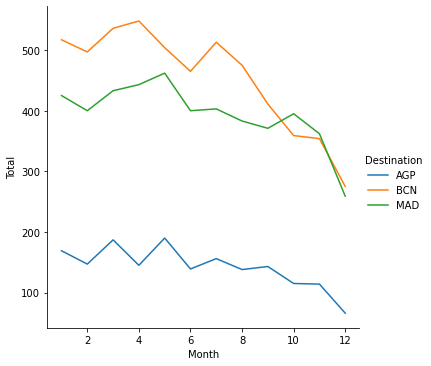

In [44]:
import seaborn as sns

sns.relplot(data=df,x='Month',y='Total',hue='Destination',kind='line');